# (3주차) Ch5 행렬, Part2 : 행렬의 확장 개념

## Ch5.1 행렬 노름

5.1.1 행렬의 대각합과 프로베니우스 노름

## Ch5.2 행렬 공간(열, 행, 영)

5.2.1 열공간

5.2.2 행공간

### 5.2.3 영공간
열공간 Ax = b
영공간 Ay = 0

In [ ]:
# SciPy 라이브러리
A = np.array([[1,-1],[-2,2]])
B = np.array([1,-1], [-2,3])

print(scipy.linalg.null_space(A))
print(scipy.linalg.null_space(B))

## Ch5.3 계수

5.3.1 특수 행렬의 계수

5.3.2 덧셈 및 곱셈 행렬의 개수

5.3.3 이동된 행렬의 계수

### 5.3.4 이론과 실제

In [ ]:
# NumPy가 0이 아닌 특잇값을 세지 않음
S = svd(M)
return count_nonzero(S>tol)
# M은 행렬
# S는 특잇값 벡터
# tol은 허용 임곗값

## Ch5.4 계수 응용

5.4.1 벡터가 열공간에 존재하나요?


> 실제로는 거의 모든 데이터 벡터가 열공간에 없기 때문에 열공간의 데이터와 충분히 가까운지를 확인하여 통계적으로 유의미를 간주



5.4.2 벡터 집합의 선형 독립성

## Ch5.5 행렬식

5.5.1 행렬식 계산

5.5.2 선형 종속성과 행렬식

5.5.3 특성 다항식

## Ch5.6 정리



*   행렬 노름에는 많은 종류, 원소별과 유도별로 크게 분류 가능
  *   원소별 : 행렬의 원소의 크기를 반영
    *   가장 일반적 : 프로베니우스 노름( = 유클리드 노름)
    *   원소의 제곱합의 제곱근으로 계산
  *   유도별 : 벡터에 대한 행렬의 기하학적 변환 효과를 반영
*   행렬의 대각합 = 대각 원소의 합
*   네 개의 행렬 공간(열, 행, 영, 왼쪽-영)
  * 서로 다른 특징의 선형 가중 결합 집합으로 정의
* 행렬의 열공간은 행렬에 있는 열의 모든 선형 가중 결합으로 구성되며 C(A)로 나타남
* 선형대수학에서 중요한 부분은 어떤 벡터 b가 행렬의 열공간에 존재하는지의 여부
  * Ax = b를 만족하는 벡터 x가 존재한다는 것
  * 이 부분을 아는 것이 많은 통계 모델 적합 알고리즘의 기초
* 행렬의 행공간은 행렬의 행에 대한 선형 가중 결합 집합
  * R(A), C(A^T)로 나타냄
* 행렬의 영공간은 열을 선형으로 결합하여 영벡터를 생성하는 벡터 집합.
  * 방정식 Ay=0을 만족하는 벡터 y
  * y=0인 자명한 해는 제외
  * 영공간은 다른 응용 중에서도 고유벡터를 찾는데 중요



# Ch5 연습문제

**[연습 문제 5-3]**

대각합 연산과 유클리드 공식의 결과(프로베니우스 노름)가 동일하다는 것을 구현하라.

대각합 공식은 A^TA에서만 동작하는가?

아니라면 AA^T에서도 결과가 동일한가?

In [ ]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6]])

# A^T * A와 A * A^T 계산
ATA = A.T @ A
AAT = A @ A.T

# 대각합 연산 계산
trace_ATA = np.trace(ATA)
trace_AAT = np.trace(AAT)

# 프로베니우스 노름 계산
frobenius_norm = np.linalg.norm(A, 'fro') ** 2

print(f"A^T * A의 대각합: {trace_ATA}")
print(f"A * A^T의 대각합: {trace_AAT}")
print(f"A의 프로베니우스 노름의 제곱: {frobenius_norm}")

# 비교
print(f"A^T * A의 대각합과 프로베니우스 노름이 같은가? {np.isclose(trace_ATA, frobenius_norm)}")
print(f"A * A^T의 대각합과 프로베니우스 노름이 같은가? {np.isclose(trace_AAT, frobenius_norm)}")

A^T * A의 대각합: 91
A * A^T의 대각합: 91
A의 프로베니우스 노름의 제곱: 91.0
A^T * A의 대각합과 프로베니우스 노름이 같은가? True
A * A^T의 대각합과 프로베니우스 노름이 같은가? True


*두 경우에서 대각합이 행렬의 프로베니우스 노름의 제곱과 동일하게 나옴!!!*

> *프로베니우스 노름은 모든 성분의 제곱합이기 때문에 대각합을 구할 때 결국 동일한 결과가 나온다!!!!*



**[연습 문제 5-4]**

행렬 이동이 행렬 노름에 미치는 영향

10X10 난수 행렬을 만들고 프로베니우스 노름을 계산

for문 내부에 다음 단계를 코딩

  1. 노름의 일부만큼 행렬을 이동

  2. 원래 행렬에서 노름의 변화율을 계산

  3. 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리 계산

  4. 행렬의 원소 사이의 상관계수 계산
  
    (힌트 : np.flatten()을 사용해서 벡터화된 행렬의 상관관계를 계산)

이동시킬 값인 노름의 비율은 0에서 1사이를 30개의 단계로 나누어 진행

루프의 각 반복에서는 이전 반복에서 이동된 행렬이 아닌 원래 행렬을 사용

In [ ]:
import numpy as np

original_matrix = np.random.rand(10, 10)

# 원래 행렬의 프로베니우스 노름 계산
original_norm = np.linalg.norm(original_matrix, 'fro')

# 이동 비율 설정 (30단계)
ratios = np.linspace(0, 1, 30)

# 결과 저장
norm_changes = []
frobenius_distances = []
correlations = []

In [ ]:
# for문을 통한 이동 및 계산
for ratio in ratios:
    # 이동할 값 계산 (원래 행렬의 노름에 대한 비율)
    shift_value = ratio * original_norm

    # 행렬 이동 (각 원소에 shift_value를 더함)
    shifted_matrix = original_matrix + shift_value

    # 이동된 행렬의 프로베니우스 노름 계산
    shifted_norm = np.linalg.norm(shifted_matrix, 'fro')

    # 노름의 변화율 계산
    norm_change_rate = (shifted_norm - original_norm) / original_norm
    norm_changes.append(norm_change_rate)

    # 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리 계산
    frobenius_distance = np.linalg.norm(shifted_matrix - original_matrix, 'fro')
    frobenius_distances.append(frobenius_distance)

    # 원래 행렬과 이동된 행렬 사이의 상관계수 계산
    original_flat = original_matrix.flatten()
    shifted_flat = shifted_matrix.flatten()
    correlation = np.corrcoef(original_flat, shifted_flat)[0, 1]
    correlations.append(correlation)

In [ ]:
# 결과
print("노름의 변화율:", norm_changes)
print("프로베니우스 거리:", frobenius_distances)
print("상관계수:", correlations)

노름의 변화율: [0.0, 0.31006749270233847, 0.6341253927680496, 0.9652650944749983, 1.3004304189113967, 1.6380874627961923, 1.9773886106604543, 2.317829493032648, 2.6590920020139586, 3.000965901127665, 3.343306820061028, 3.6860124042526308, 4.029008103080463, 4.372238348892104, 4.715660887612514, 5.059243023305681, 5.4029590641509015, 5.746788544731809, 6.090714962955085, 6.434724865981551, 6.778807177725401, 7.122952696651546, 7.467153715639246, 7.811403730672373, 8.155697215066093, 8.500029442662248, 8.844396348042308, 9.188794415026068, 9.533220587000093, 9.877672194249898]
프로베니우스 거리: [0.0, 2.118272147510085, 4.23654429502017, 6.3548164425302565, 8.47308859004034, 10.591360737550426, 12.709632885060513, 14.827905032570596, 16.94617718008068, 19.064449327590772, 21.182721475100852, 23.30099362261094, 25.419265770121026, 27.537537917631113, 29.65581006514119, 31.77408221265129, 33.89235436016136, 36.01062650767145, 38.128898655181544, 40.24717080269162, 42.365442950201704, 44.483715097711794,

**[연습 문제 5-5]**

임의의 계수를(행렬 크기 등에 대한 제약 조건에 따라) 가진 난수 행렬을 만들어라.

계수가 r인 MXN 행렬을 만들려면 난수 MXr 행렬에 rXN 행렬을 곱하여야 한다.

python에서 이를 구현하고 계수가 실제로 r인지 확인하여라.

\( r > \min(M, N) \)을 설정하면 어떻게 되고 그 이유가 무엇인지 설명하여라.

In [ ]:
import numpy as np

# 행렬의 크기 및 계수 설정
M = 5  # 행의 수
N = 4  # 열의 수
r = 3  # 계수 (rank)

# 난수 행렬 생성
A = np.random.rand(M, r)  # MxR 행렬
B = np.random.rand(r, N)  # RxN 행렬

In [ ]:
# 두 행렬의 곱을 통해 MxN 행렬 생성
C = A @ B

# 결과 행렬의 계수 계산
rank_C = np.linalg.matrix_rank(C)

# 결과 출력
print(f"MxN 행렬의 크기: {M}x{N}")
print(f"생성된 행렬의 계수 (rank): {rank_C}")
print(f"설정한 계수 r: {r}")

MxN 행렬의 크기: 5x4
생성된 행렬의 계수 (rank): 3
설정한 계수 r: 3


In [ ]:
# r > min(M, N)인 경우
r_too_large = 6  # r > min(M, N)인 경우 (min(5, 4) = 4)
A_large = np.random.rand(M, r_too_large)
B_large = np.random.rand(r_too_large, N)
C_large = A_large @ B_large
rank_C_large = np.linalg.matrix_rank(C_large)

print(f"\n(r > min(M, N)) MxN 행렬의 계수: {rank_C_large}")


(r > min(M, N)) MxN 행렬의 계수: 4


> *행렬의 계수는 행렬의 **작은 차원**인 \( \min(M, N) \)보다 클 수 없다!!*

*\( r > \min(M, N) \)를 설정하면, 행렬의 계수는 최대 \( \min(M, N) \)로 제한되는 것.*

**[연습 문제 5-6]**

더한 결과가 (1) 계수-0, (2) 계수-1, (3) 계수-2가 되는 세 쌍의 계수-1 행렬을 만들어라.

그리고 이를 이용하여 행렬 계수(r(A+B)<=r(A)+r(B))의 덧셈 법칙을 구현하여라.

그 후 덧셈 대신 행렬 곱셈에 대해서도 이 문제를 풀어보어라.

In [ ]:
import numpy as np

# 2x2 계수-1 행렬 생성 함수
def create_rank_1_matrix():
    u = np.random.rand(2, 1)  # 2x1 벡터
    v = np.random.rand(1, 2)  # 1x2 벡터
    return u @ v  # 2x2 계수-1 행렬 생성

# 세 쌍의 계수-1 행렬 생성
A1, B1 = create_rank_1_matrix(), -create_rank_1_matrix()  # 계수-0이 되도록 더할 쌍
A2, B2 = create_rank_1_matrix(), create_rank_1_matrix()   # 계수-1이 되도록 더할 쌍
A3, B3 = create_rank_1_matrix(), np.array([[1, 0], [0, 1]])  # 계수-2가 되도록 더할 쌍

In [ ]:
# 덧셈과 계수 확인
sum1 = A1 + B1
sum2 = A2 + B2
sum3 = A3 + B3

rank_sum1 = np.linalg.matrix_rank(sum1)
rank_sum2 = np.linalg.matrix_rank(sum2)
rank_sum3 = np.linalg.matrix_rank(sum3)

# 계수의 덧셈 법칙 확인: r(A + B) <= r(A) + r(B)
print(f"(1) 계수-0: r(A1 + B1) = {rank_sum1}, r(A1) + r(B1) = {np.linalg.matrix_rank(A1) + np.linalg.matrix_rank(B1)}")
print(f"(2) 계수-1: r(A2 + B2) = {rank_sum2}, r(A2) + r(B2) = {np.linalg.matrix_rank(A2) + np.linalg.matrix_rank(B2)}")
print(f"(3) 계수-2: r(A3 + B3) = {rank_sum3}, r(A3) + r(B3) = {np.linalg.matrix_rank(A3) + np.linalg.matrix_rank(B3)}")

(1) 계수-0: r(A1 + B1) = 2, r(A1) + r(B1) = 2
(2) 계수-1: r(A2 + B2) = 2, r(A2) + r(B2) = 2
(3) 계수-2: r(A3 + B3) = 2, r(A3) + r(B3) = 3


In [ ]:
# 곱셈과 계수 확인
prod1 = A1 @ B1
prod2 = A2 @ B2
prod3 = A3 @ B3

rank_prod1 = np.linalg.matrix_rank(prod1)
rank_prod2 = np.linalg.matrix_rank(prod2)
rank_prod3 = np.linalg.matrix_rank(prod3)

# 행렬 곱셈의 계수 확인
print(f"\n(1) 계수-0: r(A1 @ B1) = {rank_prod1}")
print(f"(2) 계수-1: r(A2 @ B2) = {rank_prod2}")
print(f"(3) 계수-2: r(A3 @ B3) = {rank_prod3}")


(1) 계수-0: r(A1 @ B1) = 1
(2) 계수-1: r(A2 @ B2) = 1
(3) 계수-2: r(A3 @ B3) = 1


**[연습 문제 5-7]**

[연습 문제 5-5]의 코드를 매개변수 M과 r을 입력으로 받아 계수-r인 MXM 난수 행렬을 출력하는 python 함수에 넣어라.

이중 for 루프에서 2부터 15까지의 각 계수를 가지는 20X20 행렬 쌍을 만들어라.

이 행렬들을 더한 결과 행렬의 계수와 곱한 결과 행렬의 계수를 저장하여라

(이 계수를 행렬로 만들어서 개별 행렬의 계수로 시각화 할 수 있음)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 계수-r인 MxM 난수 행렬을 생성하는 함수
def create_random_rank_matrix(M, r):
    A = np.random.rand(M, r)  # MxR 행렬
    B = np.random.rand(r, M)  # RxM 행렬
    return A @ B  # 결과적으로 MxM 계수-r 행렬 생성

# 행렬 크기 및 계수 범위 설정
M = 20
rank_range = range(2, 16)  # 2부터 15까지의 계수

# 결과를 저장할 행렬 초기화
sum_ranks = np.zeros((len(rank_range), len(rank_range)))
product_ranks = np.zeros((len(rank_range), len(rank_range)))

In [ ]:
# 이중 for 루프를 통해 행렬 생성 및 연산
for i, r1 in enumerate(rank_range):
    for j, r2 in enumerate(rank_range):
        # 계수-r1과 계수-r2인 행렬 생성
        A = create_random_rank_matrix(M, r1)
        B = create_random_rank_matrix(M, r2)

        # 행렬 덧셈 및 곱셈
        sum_matrix = A + B
        product_matrix = A @ B

        # 덧셈 결과의 계수 저장
        sum_ranks[i, j] = np.linalg.matrix_rank(sum_matrix)

        # 곱셈 결과의 계수 저장
        product_ranks[i, j] = np.linalg.matrix_rank(product_matrix)

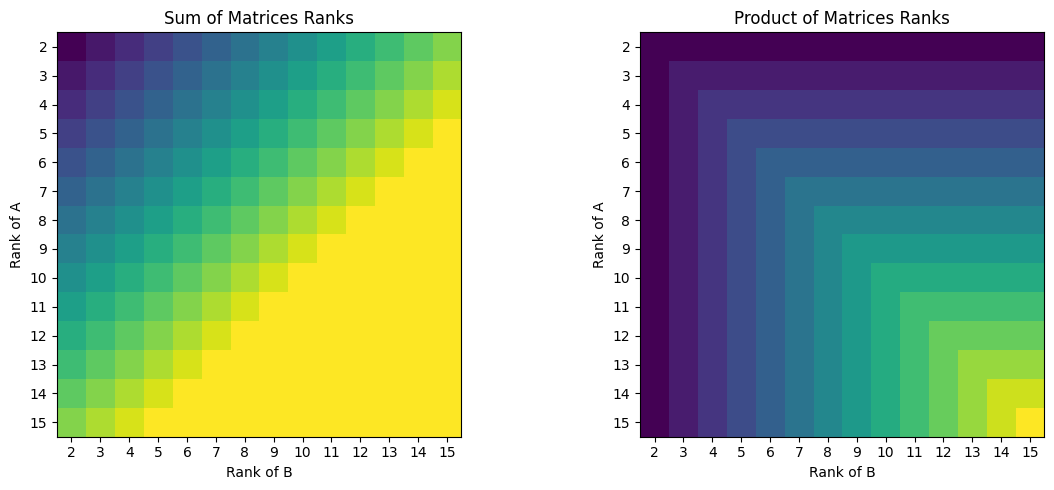

In [ ]:
# 결과 시각화
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 덧셈 결과의 계수 시각화
axs[0].imshow(sum_ranks, cmap='viridis', origin='upper')
axs[0].set_title('Sum of Matrices Ranks')
axs[0].set_xlabel('Rank of B')
axs[0].set_ylabel('Rank of A')
axs[0].set_xticks(np.arange(len(rank_range)))
axs[0].set_yticks(np.arange(len(rank_range)))
axs[0].set_xticklabels(rank_range)
axs[0].set_yticklabels(rank_range)

# 곱셈 결과의 계수 시각화
axs[1].imshow(product_ranks, cmap='viridis', origin='upper')
axs[1].set_title('Product of Matrices Ranks')
axs[1].set_xlabel('Rank of B')
axs[1].set_ylabel('Rank of A')
axs[1].set_xticks(np.arange(len(rank_range)))
axs[1].set_yticks(np.arange(len(rank_range)))
axs[1].set_xticklabels(rank_range)
axs[1].set_yticklabels(rank_range)

# 그래프 보여주기
plt.tight_layout()
plt.show()


흐음....

**[연습 문제 5-8]**

행렬 A, A^T, A^T, AA^T의 계수는 모두 동일함.

다양한 크기나 모양(정방, 높은, 넓은), 계수의 난수 행렬을 사용하여 이를 구현하는 코드를 작성하여라.

In [ ]:
import numpy as np

# 다양한 크기와 모양의 행렬 생성
matrices = {
    "정방 행렬 (5x5)": np.random.rand(5, 5),
    "높은 행렬 (6x4)": np.random.rand(6, 4),
    "넓은 행렬 (4x6)": np.random.rand(4, 6)
}

In [ ]:
# 각 행렬의 계수를 저장하고 출력하는 함수
def check_matrix_ranks(matrix, name):
    # 행렬의 계수
    rank_A = np.linalg.matrix_rank(matrix)

    # 전치 행렬의 계수
    rank_AT = np.linalg.matrix_rank(matrix.T)

    # A^T A의 계수
    rank_ATA = np.linalg.matrix_rank(matrix.T @ matrix)

    # AA^T의 계수
    rank_AAT = np.linalg.matrix_rank(matrix @ matrix.T)
    # 결과 출력
    print(f"\n{name}:")
    print(f"  A의 계수: {rank_A}")
    print(f"  A^T의 계수: {rank_AT}")
    print(f"  A^T A의 계수: {rank_ATA}")
    print(f"  A A^T의 계수: {rank_AAT}")
    print(f"  모두 동일한가? {rank_A == rank_AT == rank_ATA == rank_AAT}")

In [ ]:
# 각 행렬에 대해 계수 확인
for name, matrix in matrices.items():
    check_matrix_ranks(matrix, name)


정방 행렬 (5x5):
  A의 계수: 5
  A^T의 계수: 5
  A^T A의 계수: 5
  A A^T의 계수: 5
  모두 동일한가? True

높은 행렬 (6x4):
  A의 계수: 4
  A^T의 계수: 4
  A^T A의 계수: 4
  A A^T의 계수: 4
  모두 동일한가? True

넓은 행렬 (4x6):
  A의 계수: 4
  A^T의 계수: 4
  A^T A의 계수: 4
  A A^T의 계수: 4
  모두 동일한가? True


**[연습 문제 5-9]**

> v∈C(A)의 답을 구하는 것이 최종 목적

정규 분포에서 무작위로 추출한 숫자를 사용해 계수-3 행렬A∈R^(4X3)과 벡터v∈R^4를 만들어라.

앞에서 설명한 알고리즘에 따라 벡터가 행렬의 열공간에 있는지 여부를 확인하여라.

코드를 여러번 실행해서 일관된 패턴을 보이는지도 확인하여라.

그런 다음 A∈R^(4X4) 계수-4 행렬을 사용하여라.

(출제자는 코딩의 오류가 없을시, A가 4X4 난수 행렬일 때, 항상 v∈C(A)를 찾을 수 있다는 데에 확신한다.)

괄호의 이유를 설명하여라.

또한, 테스트 결과에 따라 True 또는 False를 반환하고 벡터 크기가 확장된 행렬과 일치하지 않을 때 예외(즉, 유용한 오류 메시지)를 발생시키는 함수에 이 코드를 넣어보아라.

In [ ]:
import numpy as np

# 열공간에 있는지 확인하는 함수
def is_in_column_space(A, v):
    try:
        # A의 행과 v의 크기가 맞는지 확인
        if A.shape[0] != v.shape[0]:
            raise ValueError("벡터 v의 크기가 행렬 A의 행 수와 일치하지 않습니다.")

        # 행렬 방정식 Ax = v의 최소제곱 해 구하기
        x, residuals, rank, s = np.linalg.lstsq(A, v, rcond=None)

        # 해를 통해 벡터를 재구성하여 비교
        v_in_col_space = np.allclose(A @ x, v)

        return v_in_col_space
    except ValueError as e:
        print(f"오류: {e}")
        return False

In [ ]:
# 테스트를 위한 코드
def test_column_space():
    # 계수-3 행렬 A (4x3) 생성 및 벡터 v 생성
    A_4x3 = np.random.randn(4, 3)
    v_4 = np.random.randn(4)

    # 열공간 테스트
    print(f"4x3 행렬의 경우: {is_in_column_space(A_4x3, v_4)}")

    # 계수-4 행렬 A (4x4) 생성 및 벡터 v 생성
    A_4x4 = np.random.randn(4, 4)

    # 열공간 테스트
    print(f"4x4 행렬의 경우: {is_in_column_space(A_4x4, v_4)}")

In [ ]:
# 함수 실행하여 패턴 확인
test_column_space()

4x3 행렬의 경우: False
4x4 행렬의 경우: True


**정방 행렬**이 full rank(계수 = 4)라면!!
*   이 행렬의 열은 선형 독립임.
*   모든 R^4의 벡터를 표현할 수 있음.

벡터는 항상 행렬의 열공간에 포함됨!!